# Question and problem definition

# workflow

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
train = pd.read_csv("../datasets/london/train.csv",header=None)
test = pd.read_csv("../datasets/london/test.csv",header=None)
train_labels =pd.read_csv("../datasets/london/trainLabels.csv",header=None)
#combine=[x_train,x_test]

# data exploration & data visualization

In [4]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761


In [5]:
train.info()
print('_'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [6]:
test.describe().transpose()[test.describe().transpose()["std"]>3]

,count,mean,std,min,25%,50%,75%,max
4,9000.0,1.262429,4.527492,-17.296514,-1.669099,1.123982,4.002391,20.551947
12,9000.0,-1.957133,4.533104,-18.354435,-5.094238,-2.179444,1.097400,15.727476
23,9000.0,1.020193,4.427654,-16.034095,-1.820445,1.028496,3.977142,20.152382


# use KNN 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [8]:
X,y=train,np.ravel(train_labels)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
k=np.arange(2,25)
kfold=10
train_acc=[]
val_acc=[]
best_acc=0
best_K=None
for j in k:
    KNN_clf=KNeighborsClassifier(n_neighbors=j)
    KNN_clf.fit(X_train,y_train)
    ypred=KNN_clf.predict(X_test)
    #train accuracy
    train_acc.append(KNN_clf.score(X_train,y_train))
    #validation accuracy
    val_acc.append(np.mean(cross_val_score(KNN_clf,X,y,cv=kfold)))
    if np.mean(cross_val_score(KNN_clf,X,y,cv=kfold)) > best_acc:
        best_acc=np.mean(cross_val_score(KNN_clf,X,y,cv=kfold))
        best_K=KNN_clf

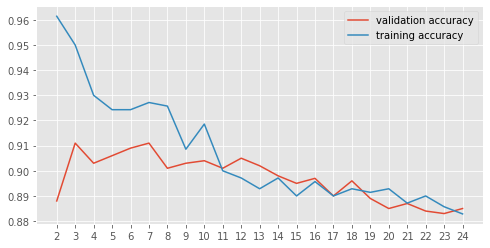

In [12]:
plt.figure(figsize=[8,4])
plt.plot(k,val_acc,label="validation accuracy")
plt.plot(k,train_acc,label="training accuracy")
plt.xticks(k)
plt.legend()
plt.show()

In [13]:
print(best_acc)
print(best_K)

0.9109999999999999
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [14]:
test_pred= best_K.predict(test)

# add scaling

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [21]:
k=np.arange(2,30)
kfold=10
val_acc={'std':[], 'mms':[], 'norm':[]}
best_acc=0
best_K=None
best_scaling=None
for i,j in enumerate(k):
    knn_clf=KNeighborsClassifier(n_neighbors=j)
    #StandardScaler
    val_acc['std'].append(np.mean(cross_val_score(knn_clf,X_std,y,cv=kfold)))
    if best_acc < np.mean(cross_val_score(knn_clf,X_std,y,cv=kfold)):
        best_acc=np.mean(cross_val_score(knn_clf,X_std,y,cv=kfold))
        best_K=knn_clf 
        best_scaling='std'
    #MinMaxScaler
    val_acc['mms'].append(np.mean(cross_val_score(knn_clf,X_mms,y,cv=kfold)))    
    if best_acc < np.mean(cross_val_score(knn_clf,X_mms,y,cv=kfold)):
        best_acc=np.mean(cross_val_score(knn_clf,X_mms,y,cv=kfold))
        best_K=knn_clf
        best_scaling='mms'   
    #Normalizer
    val_acc['norm'].append(np.mean(cross_val_score(knn_clf,X_norm,y,cv=kfold)))
    if best_acc < np.mean(cross_val_score(knn_clf,X_norm,y,cv=kfold)):
        best_acc=np.mean(cross_val_score(knn_clf,X_norm,y,cv=kfold))
        best_K=knn_clf
        best_scaling='norm'    

In [22]:
print(best_acc)
print(best_K)
print(best_scaling)

0.9019999999999999
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
norm


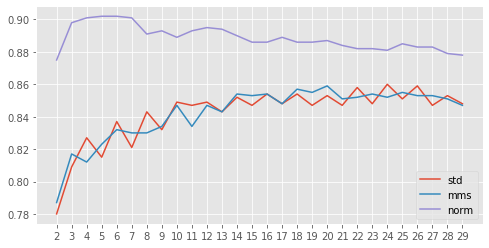

In [26]:
plt.figure(figsize=[8,4])
plt.plot(k,val_acc['std'],label='std')
plt.plot(k,val_acc['mms'],label='mms')
plt.plot(k,val_acc['norm'],label='norm')
plt.xticks(k)
plt.legend()
plt.show()

# feature selection

In [32]:
#pd.DataFrame(X_std).corr()

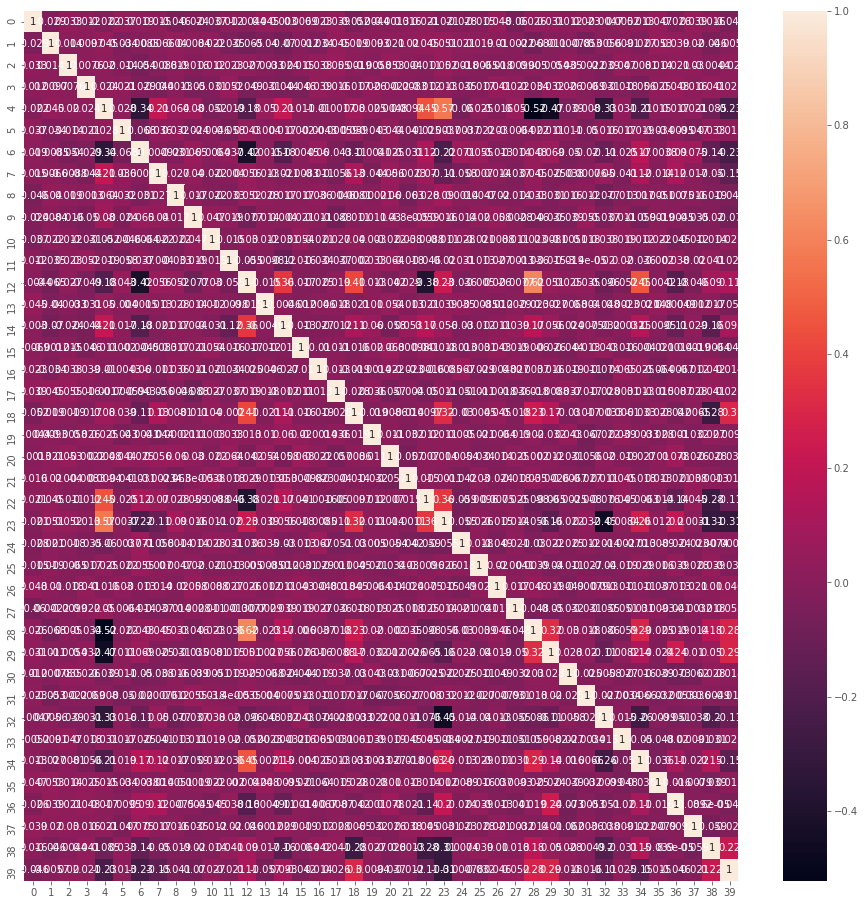

In [35]:
plt.figure(figsize=[16,16])
sns.heatmap(pd.DataFrame(X_std).corr(),annot=True)

In [36]:
#feature selectio using RFECV

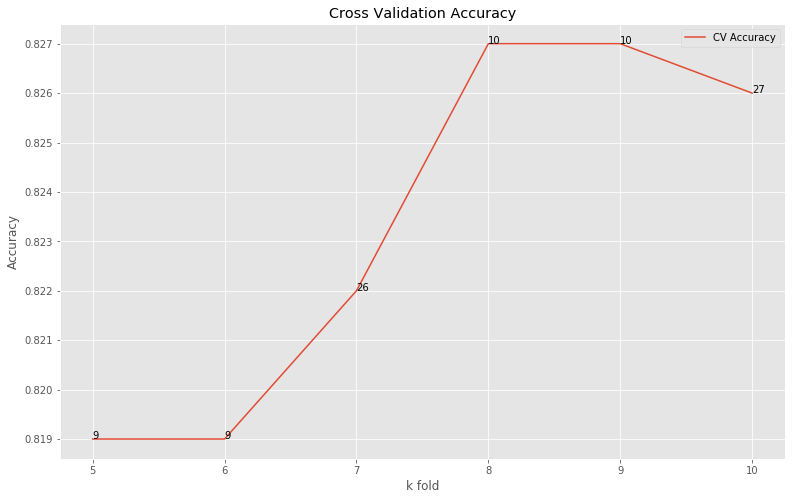

Best Accuracy with feature scaling and RFECV: 0.827


In [38]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

kfold = 10
bestSVC = None
bestAcc = 0.0
val_accuracy = []
cv_range = np.arange(5, 11)
n_feature = []
for cv in cv_range:
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_std, y)

    # print("Optimal number of features : %d" % rfecv.n_features_)
    # print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])
    # Model complexity
    val_accuracy += [np.mean(cross_val_score(svc, X_std[:, rfecv.support_], y, cv=kfold))]
    n_feature.append(rfecv.n_features_)
    if val_accuracy[-1] > bestAcc:
        bestAcc = val_accuracy[-1]

# Plot
plt.figure(figsize=[13,8])
plt.plot(cv_range, val_accuracy, label = 'CV Accuracy')
for i in range(len(cv_range)):
    plt.annotate(str(n_feature[i]), xy=(cv_range[i],val_accuracy[i]))
plt.legend()
plt.title('Cross Validation Accuracy')
plt.xlabel('k fold')
plt.ylabel('Accuracy')
plt.show()

print('Best Accuracy with feature scaling and RFECV:', bestAcc)

In [ ]:
import numpy as np
#import sklearn as sk
#import matplotlib.pyplot as plt
import pandas as pd

#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Perceptron
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
#from sklearn import svm

#### READING OUR GIVEN DATA INTO PANDAS DATAFRAME ####
x_train = train
y_train = trainLabel
x_test = test
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_train = y_train.ravel()

print('training_x Shape:',x_train.shape,',training_y Shape:',y_train.shape, ',testing_x Shape:',x_test.shape)

#Checking the models
x_all = np.r_[x_train,x_test]
print('x_all shape :',x_all.shape)

#### USING THE GAUSSIAN MIXTURE MODEL ####
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)


#### TAKING ONLY TWO MODELS FOR KEEPING IT SIMPLE ####
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

param_grid = dict( )
#### GRID SEARCH for BEST TUNING PARAMETERS FOR KNN #####
grid_search_knn = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy').fit(x_train,y_train)
print('best estimator KNN:',grid_search_knn.best_estimator_,'Best Score', grid_search_knn.best_estimator_.score(x_train,y_train))
knn_best = grid_search_knn.best_estimator_

#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf = GridSearchCV(rf, param_grid=dict( ), verbose=3,scoring='accuracy',cv=10).fit(x_train,y_train)
print('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(x_train,y_train))
rf_best = grid_search_rf.best_estimator_
knn_best.fit(x_train,y_train)
print(knn_best.predict(x_test)[0:10])
rf_best.fit(x_train,y_train)
print(rf_best.predict(x_test)[0:10])

#### SCORING THE MODELS ####
print('Score for KNN :',cross_val_score(knn_best,x_train,y_train,cv=10,scoring='accuracy').mean())
print('Score for Random Forest :',cross_val_score(rf_best,x_train,y_train,cv=10,scoring='accuracy').max())

### IN CASE WE WERE USING MORE THAN ONE CLASSIFIERS THEN VOTING CLASSIFIER CAN BE USEFUL ###
#clf = VotingClassifier(
#		estimators=[('knn_best',knn_best),('rf_best',rf_best)],
#		#weights=[871856020222,0.907895269918]
#	)
#clf.fit(x_train,y_train)
#print clf.predict(x_test)[0:10]

##### FRAMING OUR SOLUTION #####
knn_best_pred = pd.DataFrame(knn_best.predict(x_test))
rf_best_pred = pd.DataFrame(rf_best.predict(x_test))
#voting_clf_pred = pd.DataFrame(clf.predict(x_test))
knn_best_pred.index += 1
rf_best_pred.index += 1
#voting_clf_pred.index += 1

rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

#knn_best_pred.to_csv('knn_best_pred.csv')
rf_best_pred.to_csv('Submission_rf.csv', index=False)
#voting_clf_pred.to_csv('voting_clf_pred.csv')